## Assembler des circuits

### Registres

In [3]:
from qiskit import QuantumRegister, ClassicalRegister

entrees = QuantumRegister  (4, 'entrees')
sorties = ClassicalRegister(4, 'sorties')

### Milieu

In [14]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(entrees, sorties)
circuit.barrier(range(entrees.size))
circuit.cx(2, 3)
circuit.draw()

░      
entrees_0: ─░──────
            ░      
entrees_1: ─░──────
            ░      
entrees_2: ─░───■──
            ░ ┌─┴─┐
entrees_3: ─░─┤ X ├
            ░ └───┘
sorties: 4/════════

### Fragments

In [15]:
hadamard = QuantumCircuit(entrees.size)
hadamard.h(range(entrees.size-1))
hadamard.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘
q_3: ─────

In [16]:
mesure = QuantumCircuit(entrees.size, sorties.size)
mesure.measure_all(add_bits=False)
mesure.draw()

░ ┌─┐         
q_0: ─░─┤M├─────────
      ░ └╥┘┌─┐      
q_1: ─░──╫─┤M├──────
      ░  ║ └╥┘┌─┐   
q_2: ─░──╫──╫─┤M├───
      ░  ║  ║ └╥┘┌─┐
q_3: ─░──╫──╫──╫─┤M├
      ░  ║  ║  ║ └╥┘
c: 4/════╩══╩══╩══╩═
         0  1  2  3

### Assemblage

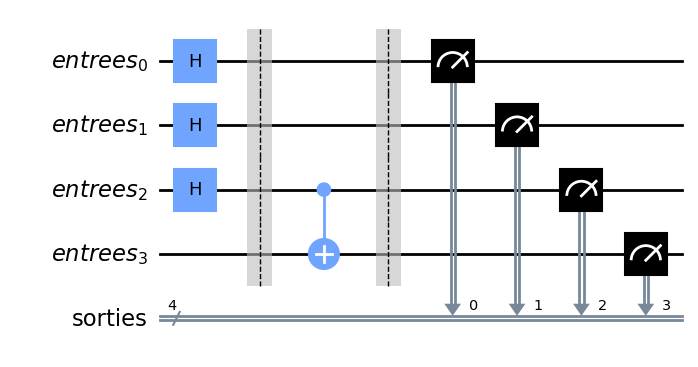

In [17]:
circuit = circuit.compose(hadamard, front=True).compose(mesure)
circuit.draw('mpl')

### Simulation partielle

In [18]:
# Qiskit v0.46.1
#  from qiskit import transpile, BasicAer

#  simulator = BasicAer.get_backend('statevector_simulator')
#  result = simulator.run(transpile(hadamard, simulator), shots=256).result()
#  states = result.get_statevector(hadamard)

# Qiskit v1.0.2
from qiskit.quantum_info import Statevector

states = Statevector(hadamard)
states

Result(backend_name='statevector_simulator', backend_version='1.1.0', qobj_id='e4dc3c42-d5d8-4dff-962a-105804ef9c3f', job_id='de44d8fe-316d-4107-8f31-08d35caed4c1', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(statevector=[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3]], n_qubits=4, qreg_sizes=[['q', 4]], clbit_labels=[], memory_slots=0, creg_sizes=[], name='circuit-129', global_phase=0.0, metadata={}), status=DONE, name='circuit-129', seed_simulator=1668987426, time_taken=0.00029659271240234375)], date=None, status=COMPLETED, header=QobjHeader(backend_name='statevector_simulator', backend_version='1.1.0'), time_taken=0.000301361083984375)

### Visualisation

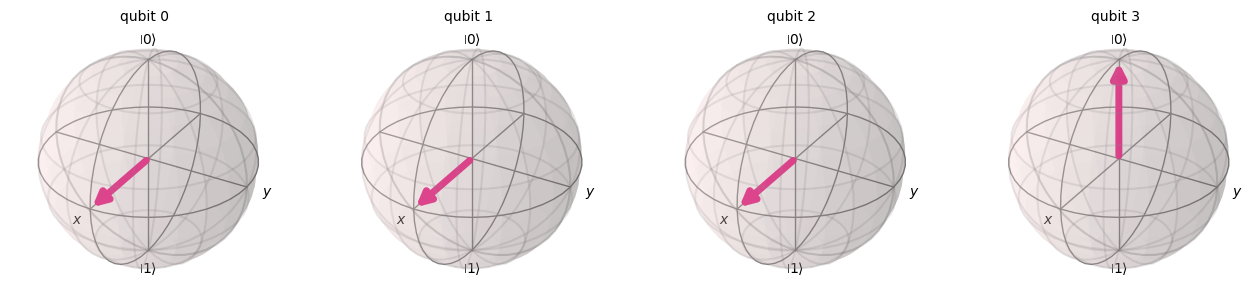

In [19]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(states)